### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
#check for missing values
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Drop the column 'car' due to high number of missing values
print("Column names:", data.columns.sort_values)
data.drop(columns=['car'], inplace=True)
#Replace missing values in other columns with the mode
for column in ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']:
 data[column].fillna(data[column].mode()[0], inplace=True)

Column names: <bound method Index.sort_values of Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')>


4. What proportion of the total observations chose to accept the coupon? 



In [6]:
proportion_accepted = data[data['Y']==1].shape[0] / data.shape[0]
print(f"Proportion of Accepted Coupons: {proportion_accepted:.2f}")

Proportion of Accepted Coupons: 0.57


5. Use a bar plot to visualize the `coupon` column.

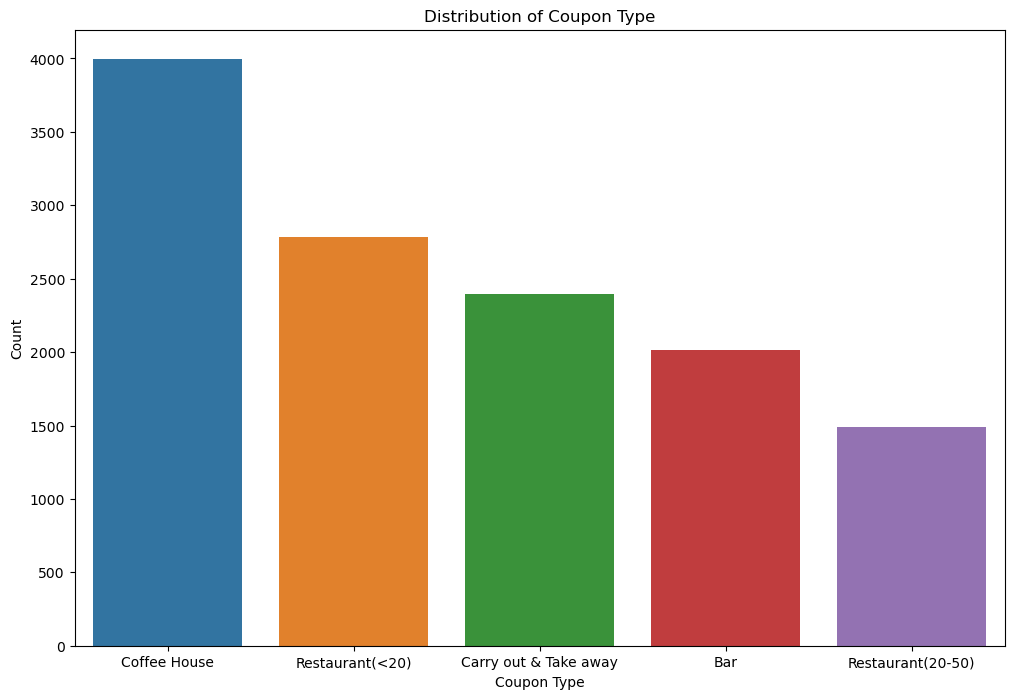

In [18]:
coupon_counts = data['coupon'].value_counts().reset_index()
coupon_counts.columns = ['coupon','count']
# Create the bar plot and set the figure size before plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='coupon', y='count', data=coupon_counts)
# Set the title and labels
plt.title('Distribution of Coupon Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
# Save the plot
plt.savefig('images/Distribution_of_Coupon_Type.png')
# Show the plot
plt.show()

6. Use a histogram to visualize the temperature column.

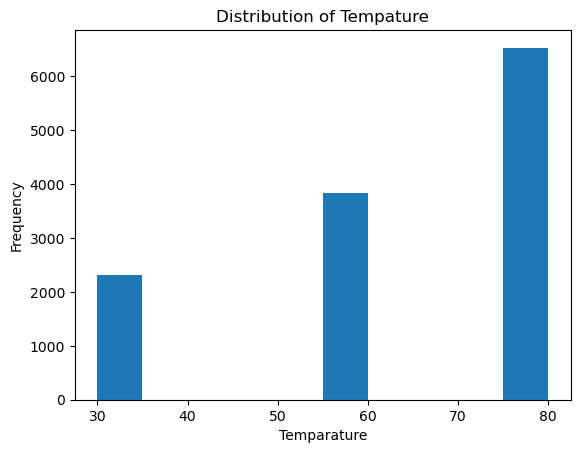

In [8]:
plt.hist(data['temperature'])
plt.title('Distribution of Tempature')
# Set the title and labels
plt.xlabel('Temparature')
plt.ylabel('Frequency')
# Save the plot
plt.savefig('images/Distribution_of_Tempature.png')
# Show the plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [9]:
# Filter the DataFrame to include only rows where the coupon is related to bars
data_bar_coupon = data[data['coupon']=='Bar'].copy()
# Define the mapping for the 'Bar' column
bar_mapping = {
    "never": 0,
    "less1": 0.5,
    "1~3": 2,
    "4~8": 6,
    "gt8": 9
}
# Apply the mapping to the 'Bar' column
data_bar_coupon['Bar'] = data_bar_coupon['Bar'].replace(bar_mapping)



2. What proportion of bar coupons were accepted?


In [10]:
# Calculate the proportion of bar coupons accepted
proportion_bar_coupon_accepted = data_bar_coupon[data_bar_coupon["Y"] == 1].shape[0]/data.shape[0]
print(f"Proportion of coupon accepted: {proportion_bar_coupon_accepted:2f}")


Proportion of coupon accepted: 0.065200


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [11]:
# Calculate the proportion of bar coupons accepted by users who go to a bar 3 times or fewer
acceptance_bar_3_times_or_lower = data_bar_coupon[(data_bar_coupon['Bar'] <= 2) & (data_bar_coupon['Y'] == 1)].shape[0]/data_bar_coupon.shape[0]


# Calculate the proportion of bar coupons accepted by users who go to a bar more than 3 times 
acceptance_bar_more_than_3 = data_bar_coupon[(data_bar_coupon['Bar'] > 2) & (data_bar_coupon['Y'] == 1)].shape[0]/data_bar_coupon.shape[0]

print(f"Proportion of bar coupons accepted by users who  go to a bar 3 times or fewer: {acceptance_bar_3_times_or_lower:2f}")
print(f"Proportion of bar coupons accepted by users who go to a bar more than 3 times: {acceptance_bar_more_than_3:2f}")


Proportion of bar coupons accepted by users who  go to a bar 3 times or fewer: 0.334160
Proportion of bar coupons accepted by users who go to a bar more than 3 times: 0.075855


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [12]:
# First, convert the 'age' column to integers
age_mapping = {
    "below21": 20,
    "21": 21,
    "26": 26,
    "31": 31,
    "36": 36,
    "41": 41,
    "46": 46,
    "50plus": 51  # approximate for above 50
}

# Replace the age categories with their corresponding integer values
data_bar_coupon['age'] = data_bar_coupon['age'].replace(age_mapping).astype(int)

# Calculate the proportion of bar coupons accepted by users who go to a bar more than once a month and are over the age of 25
acceptance_bar_more_than_one_per_month_and_over_25 = data_bar_coupon[
(data_bar_coupon['Bar'] > 1) & 
    (data_bar_coupon['age'] > 25) &
    (data_bar_coupon['Y'] == 1)
].shape[0] / data_bar_coupon.shape[0]

# Display the results
print(f"Proportion of bar coupons accepted by users who go to a bar more than once a month and are over the age of 25: {acceptance_bar_more_than_one_per_month_and_over_25:.2f}")



Proportion of bar coupons accepted by users who go to a bar more than once a month and are over the age of 25: 0.14


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [13]:
# Define the occupations to exclude
excluded_occupations = ["farming", "fishing", "forestry"]

# Filter for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry
filtered_data = data_bar_coupon[
    (data_bar_coupon['Bar'] > 1) &
    (data_bar_coupon['passanger'] != 'Kid(s)') &
    (~data_bar_coupon['occupation'].isin(excluded_occupations))
]

# Calculate the proportion of accepted bar coupons for the filtered data
acceptance_rate_filtered = filtered_data[filtered_data['Y'] == 1].shape[0] / filtered_data.shape[0]

# Display the results
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, "
      f"and had occupations other than farming, fishing, or forestry: {acceptance_rate_filtered:.2f}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: 0.71


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [14]:
# Filter for each condition and calculate the acceptance rates

# Condition 1: Drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition1 = data_bar_coupon[
    (data_bar_coupon['Bar'] > 1) &
    (data_bar_coupon['passanger'] != 'Kid(s)') &
    (data_bar_coupon['maritalStatus'] != 'widowed')
]

# Condition 2: Drivers who go to bars more than once a month and are under the age of 30
condition2 = data_bar_coupon[
    (data_bar_coupon['Bar'] > 1) &
    (data_bar_coupon['age'] < 30)
]

# Condition 3: Drivers who go to cheap restaurants more than 4 times a month and income is less than 50K
# Create a new data frame for cheap Restaurant
data_restaurant_coupon = data[data['coupon']=='Restaurant(<20)'].copy()

# Define the mapping for the 'RestaurantLessThan20' column
restaurant_mapping = {
    "never": 0,
    "less1": 0.5,
    "1~3": 2,
    "4~8": 6,
    "gt8": 9
}
# Define the mapping for the 'Income' column
income_mapping = {
    "Less than $12500": 1,
    "$12500 - $24999": 2,
    "$25000 - $37499": 3,
    "$37500 - $49999": 4,
    "$50000 - $62499": 5,
    "$62500 - $74999": 6,
    "$75000 - $87499": 7,
    "$87500 - $99999": 8,
    "$100000 or More": 9  # Fix the mapping for the specific value
}
data_restaurant_coupon['RestaurantLessThan20'] = data_restaurant_coupon['RestaurantLessThan20'].replace(restaurant_mapping)
data_restaurant_coupon['income'] = data_restaurant_coupon['income'].replace(income_mapping)
condition3 = data_restaurant_coupon[
    (data_restaurant_coupon['RestaurantLessThan20'] > 4) &
    (data_restaurant_coupon['income'] < 5)  # Assuming 4 corresponds to < 50K in income_mapping
]

# Calculate the acceptance rates for each condition
acceptance_rate_condition1 = condition1[condition1['Y'] == 1].shape[0] / condition1.shape[0] 
acceptance_rate_condition2 = condition2[condition2['Y'] == 1].shape[0] / condition2.shape[0] 
acceptance_rate_condition3 = condition3[condition3['Y'] == 1].shape[0] / condition3.shape[0] 

# Display the results
print(f"Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_rate_condition1:.2f}")
print(f"Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_rate_condition2:.2f}")
print(f"Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_rate_condition3:.2f}")

Acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.71
Acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.72
Acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.71


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [15]:
#Social Activity and Savings Motivation:
#Drivers who are socially active and enjoy frequent outings, whether to bars or restaurants, are more likely to accept bar coupons. This includes both younger drivers and those with lower incomes who may seek out deals and discounts. The presence of adult passengers, who might share an interest in visiting bars, also increases the likelihood of accepting bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

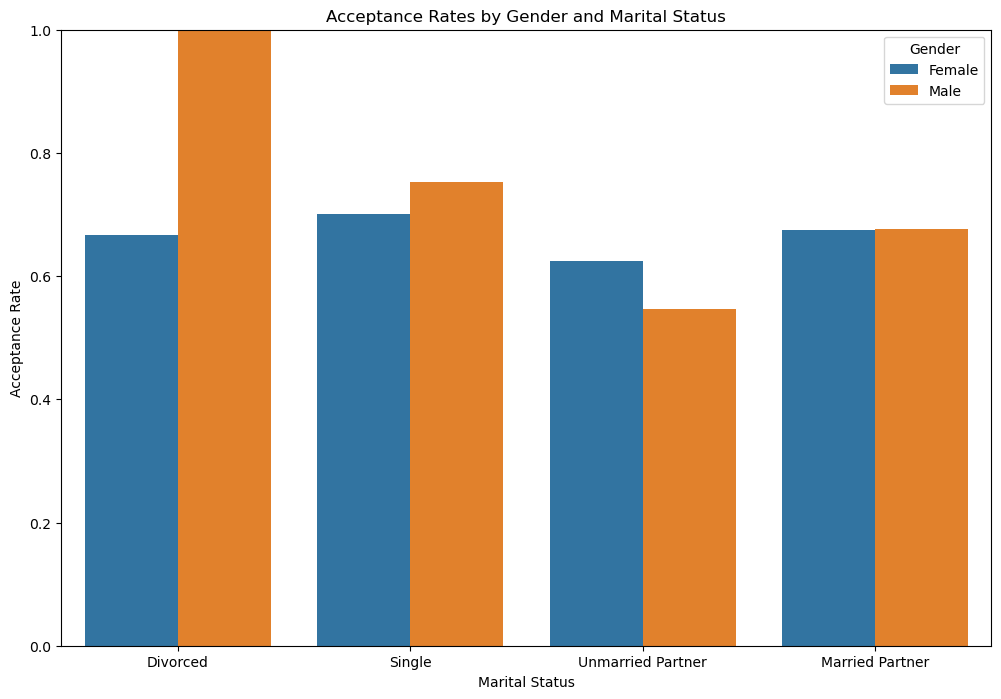

In [16]:

# Calculate acceptance rates by gender and by marital status
genders = data_bar_coupon['gender'].unique()
results = {}

for gender in genders:
    gender_condition1 = data_bar_coupon[
        (data_bar_coupon['Bar'] > 1) &
        (data_bar_coupon['maritalStatus'] == 'Divorced') &
        (data_bar_coupon['gender'] == gender)
    ]
    gender_condition2 = data_bar_coupon[
        (data_bar_coupon['Bar'] > 1) &
           (data_bar_coupon['maritalStatus'] == 'Single') &
        (data_bar_coupon['gender'] == gender)
    ]

    gender_condition3 = data_bar_coupon[
        (data_bar_coupon['Bar'] > 1) &
           (data_bar_coupon['maritalStatus'] == 'Unmarried partner') &
        (data_bar_coupon['gender'] == gender)
    ]

    gender_condition4 = data_bar_coupon[
        (data_bar_coupon['Bar'] > 1) &
           (data_bar_coupon['maritalStatus'] == 'Married partner') &
        (data_bar_coupon['gender'] == gender)
    ]

    acceptance_rate_condition1 = gender_condition1[gender_condition1['Y'] == 1].shape[0] / gender_condition1.shape[0] 
    acceptance_rate_condition2 = gender_condition2[gender_condition2['Y'] == 1].shape[0] / gender_condition2.shape[0] 
    acceptance_rate_condition3 = gender_condition3[gender_condition3['Y'] == 1].shape[0] / gender_condition3.shape[0] 
    acceptance_rate_condition4 = gender_condition4[gender_condition4['Y'] == 1].shape[0] / gender_condition4.shape[0] 

    results[gender] = {
        "Acceptance rate for drivers who go to bars more than once a month and were divorced: ": acceptance_rate_condition1,
        "Acceptance rate for drivers who go to bars more than once a month and were Single: ": acceptance_rate_condition2,
        "Acceptance rate for drivers who go to bars more than once a month and were Unmarried partner: ": acceptance_rate_condition3,
        "Acceptance rate for drivers who go to bars more than once a month and were Married partner: ": acceptance_rate_condition4
    }


# Convert results to a DataFrame
df_results = pd.DataFrame(results).transpose()
df_results.columns = [
    "Divorced",
    "Single",
    "Unmarried Partner",
    "Married Partner"
]

# Reset index to get 'gender' as a column
df_results.reset_index(inplace=True)

# Melt the DataFrame to long format for seaborn
df_long = df_results.melt(id_vars="index", var_name="Marital Status", value_name="Acceptance Rate")
df_long.columns = ["Gender", "Marital Status", "Acceptance Rate"]

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x="Marital Status", y="Acceptance Rate", hue="Gender", data=df_long)
plt.title('Acceptance Rates by Gender and Marital Status')
plt.ylabel('Acceptance Rate')
plt.xlabel('Marital Status')
plt.ylim(0, 1)
plt.legend(title='Gender')
plt.savefig('images/Acceptance_Rates_by_Gender_and_Marital_Status.png')
plt.show()

